In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Fashion MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [2]:
# 2. 데이터 전처리
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [5]:
# 3. 모델 구성

# layer의 파라미터: filter, (kernel_size), stride=(1,1), padding='valid', activation=None
model = models.Sequential([
  # Convolution Layer
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'), #32x32x3 --> 32x32x32
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)), # 32x32x32 --> 16x16x32
  layers.Dropout(0.25),  # Dropout 추가

  layers.Conv2D(64, (3, 3), activation='relu', padding='same'), # 16x16x32 --> 16x16x64
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)), # 16x16x64 --> 8x8x64
  layers.Dropout(0.25),  # Dropout 추가

  layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # 8x8x64 --> 8x8x128
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)), # 8x8x128 --> 4x4x128
  layers.Dropout(0.25),  # Dropout 추가

  layers.Conv2D(256, (3, 3), activation='relu', padding='same'), # 4x4x128 --> 4x4x256
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)), # 4x4x256 --> 2x2x256
  layers.Dropout(0.25),  # Dropout 추가

  # Dense Layer
  layers.Flatten(),
  layers.Dense(120, activation='relu'),
  layers.Dropout(0.5),  # Dropout 추가
  layers.Dense(60, activation='relu'),
  layers.Dense(10, activation='softmax') # 마지막에 class가 10개이므로
])

In [6]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # 다중 클래스 분류 문제에서 사용되는 손실 함수
              metrics=['acc'])

# 모델 요약 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        2

In [7]:
# 5. 모델 훈련
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/200
1563/1563 [==============================] - 35s 13ms/step - loss: 1.8076 - acc: 0.3290 - val_loss: 1.5529 - val_acc: 0.4055
Epoch 2/200
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4442 - acc: 0.4744 - val_loss: 1.3000 - val_acc: 0.5381
Epoch 3/200
1563/1563 [==============================] - 16s 11ms/step - loss: 1.2465 - acc: 0.5578 - val_loss: 1.1815 - val_acc: 0.5946
Epoch 4/200
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1116 - acc: 0.6110 - val_loss: 1.0614 - val_acc: 0.6244
Epoch 5/200
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0078 - acc: 0.6503 - val_loss: 1.2163 - val_acc: 0.5818
Epoch 6/200
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9474 - acc: 0.6743 - val_loss: 0.8594 - val_acc: 0.7140
Epoch 7/200
1563/1563 [==============================] - 16s 11ms/step - loss: 0.8882 - acc: 0.6929 - val_loss: 0.8496 - val_acc: 0.7090
Epoch 8/200
1563/1563 [==================

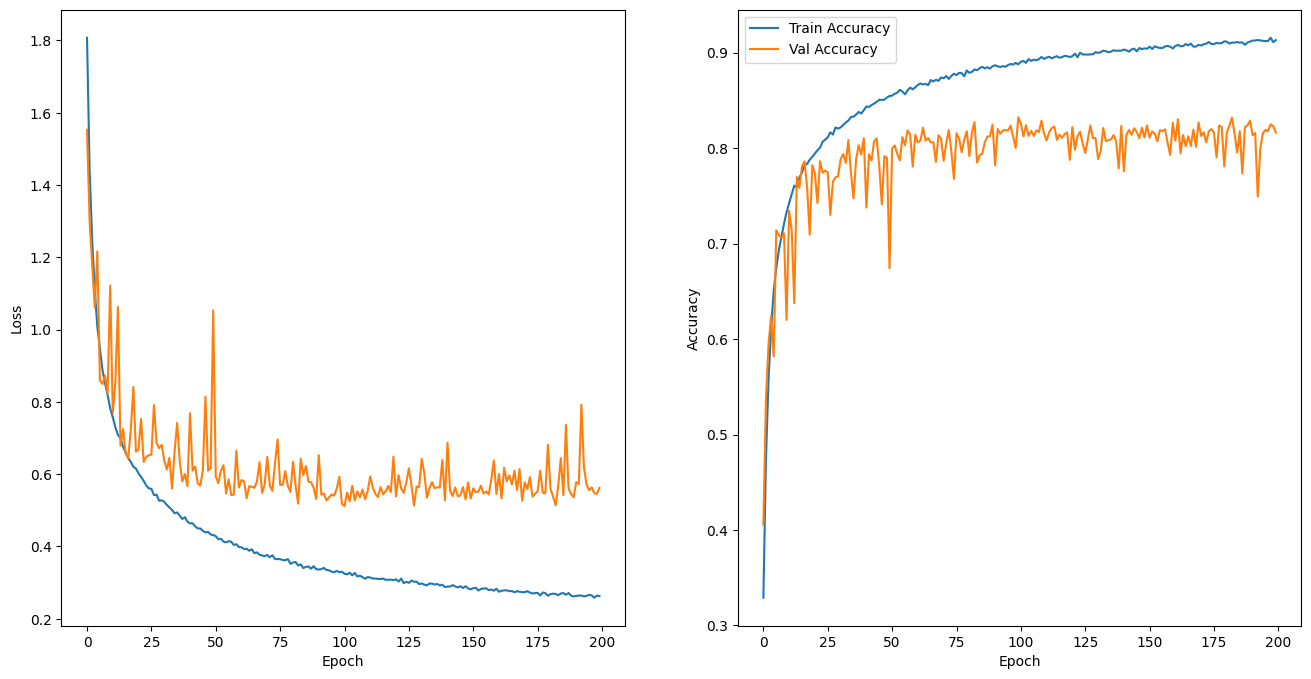

In [10]:
# 학습곡선 그리기
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],label='Val Accuracy')
  plt.legend()

  plt.show()

plot_history(history)

In [11]:
# 6. 테스트 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.5620 - acc: 0.8165
테스트 정확도: 0.8165000081062317
